In [1]:
# https://scikit-learn.org/stable/

In [2]:
import pandas as pd
import numpy as np
#import matplotlib.pyplot as plt
from matplotlib import pyplot as plt

In [3]:
df = pd.read_csv('Dhaka Rent.csv') # for excel pd.read_excel('renale.xlsx')

In [4]:
df.head()

,area,rent
0,2000,31500
1,2100,35000
2,2500,41050
3,2250,36100
4,3000,52100


In [5]:
df.tail()

,area,rent
55,3100,54000
56,2750,48500
57,1800,25100
58,2200,31560
59,3100,51600


In [6]:
df.head(7)

,area,rent
0,2000,31500
1,2100,35000
2,2500,41050
3,2250,36100
4,3000,52100
5,1900,32500
6,1500,20000


In [7]:
df.area.head(3)

0    2000
1    2100
2    2500
Name: area, dtype: int64

In [8]:
df['rent'].head(3)

0    31500
1    35000
2    41050
Name: rent, dtype: int64

In [9]:
df[5:6]

,area,rent
5,1900,32500


In [10]:
df[5:10]

,area,rent
5,1900,32500
6,1500,20000
7,1850,24500
8,2700,48000
9,2100,31000


In [11]:
df.mean()

area     2289.000000
rent    37269.166667
dtype: float64

In [12]:
df.area.mean()

2289.0

In [13]:
df.describe()

,area,rent
count,60.000000,60.000000
mean,2289.000000,37269.166667
std,538.880509,11770.736234
min,1200.000000,20000.000000
25%,1900.000000,31000.000000
50%,2130.000000,34450.000000
75%,2700.000000,47625.000000
max,3500.000000,70500.000000


In [14]:
df.area.std()

538.8805093801691

In [15]:
df.shape

(60, 2)

In [16]:
row, col = df.shape

In [17]:
row

60

In [18]:
col

2

In [19]:
df.isnull().sum()

area    0
rent    0
dtype: int64

# Vizualisation

Text(0.5, 1.0, 'Rent plot')

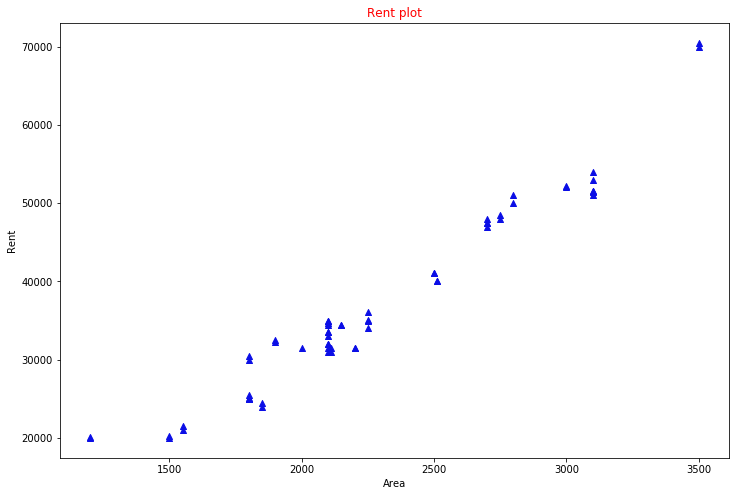

In [20]:
plt.figure(figsize=(12,8))
plt.scatter(df.area , df.rent, marker='^' , color='#0B0EE6') # https://htmlcolorcodes.com/
plt.xlabel('Area', color='black')
plt.ylabel('Rent')
plt.title('Rent plot', color='red')

In [21]:
x = df['area'] # single dim not allowed
y = ['rent']

In [22]:
x.head()

0    2000
1    2100
2    2500
3    2250
4    3000
Name: area, dtype: int64

In [23]:
x = df[['area']] # x = df.drop('area', axis=1) ; x = df.drop(columns=['area'])
y = df['rent']

In [24]:
x.head()

,area
0,2000
1,2100
2,2500
3,2250
4,3000


# Split the dataste into train and test

In [25]:
from sklearn.model_selection import train_test_split as tts

In [26]:
# train 70% ; test = 30%
xtrain, xtest, ytrain, ytest = tts(x,y,test_size=.30)

In [27]:
xtrain.head()

,area
36,1500
43,2510
1,2100
58,2200
46,1800


In [28]:
ytrain.head()

36    20200
43    40000
1     35000
58    31560
46    30000
Name: rent, dtype: int64

# Linear Regression

In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
reg = LinearRegression()

In [31]:
reg.fit(xtrain, ytrain) #training

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [32]:
m = reg.coef_
m

array([20.77521756])

In [33]:
c = reg.intercept_
c 

-10393.578140045247

In [34]:
x1 = 2100
y = m * x1 + c

In [35]:
y

array([33234.3787437])

In [36]:

reg.predict([[2100]])

array([33234.3787437])

In [37]:
pred = reg.predict(xtest)

In [38]:
pred

array([28040.57435278, 62319.68333287, 33234.3787437 , 29079.33523097,
       27001.8134746 , 33442.13091934, 36350.66137826, 47777.03103829,
       54009.59630739, 14536.68293638, 41544.46576918, 33442.13091934,
       47777.03103829, 31156.85698733, 33234.3787437 , 36350.66137826,
       33234.3787437 , 35311.90050007])

In [39]:
df['predicted result'] = reg.predict(x)

In [40]:
df.head()

,area,rent,predicted result
0,2000,31500,31156.856987
1,2100,35000,33234.378744
2,2500,41050,41544.465769
3,2250,36100,36350.661378
4,3000,52100,51932.074551


In [41]:
x1 = 2000
y = m * x1 + c
y

array([31156.85698733])

In [42]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [43]:
mse = mean_squared_error(ytest, pred)

In [44]:
mse

9881287.266422998

In [45]:
mae = mean_absolute_error(ytest, pred)

In [46]:
mae

2416.2742050771844

# Best fit line

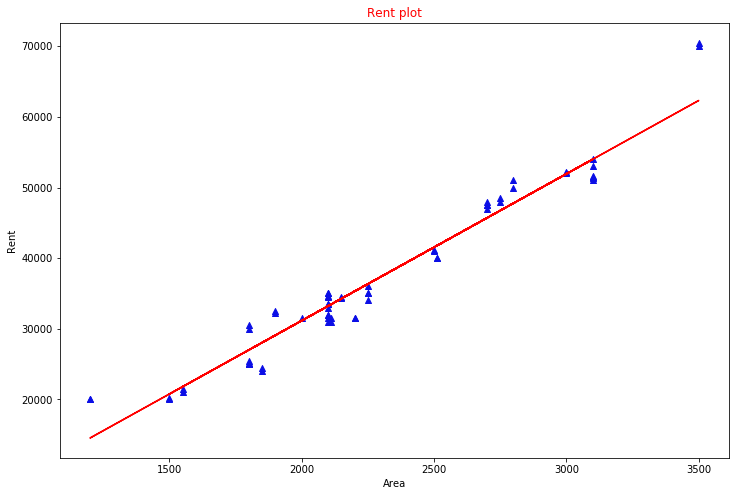

In [47]:
plt.figure(figsize=(12,8))
plt.scatter(df.area , df.rent, marker='^' , color='#0B0EE6') # https://htmlcolorcodes.com/
plt.xlabel('Area', color='black')
plt.ylabel('Rent')
plt.title('Rent plot', color='red')
plt.plot(xtrain , reg.predict(xtrain), color='red')

In [48]:
plt.figure(figsize=(12,8))
plt.xlabel('Area', color='black')
plt.ylabel('Rent')
plt.title('Rent plot', color='red')
plt.plot(xtrain , reg.predict(xtrain), color='red')
plt.scatter(xtrain, ytrain)`
plt.scatter(xtrain, reg.predict(xtrain), color='green')

SyntaxError: invalid syntax (<ipython-input-48-51198c83f280>, line 6)

In [ ]:
import warnings
warnings.filterwarnings('ignore')

reg.predict([[2500]])

In [ ]:
reg.score(xtest, ytest)

In [ ]:
from sklearn.metrics import r2_score
r2_score(ytest, pred)